In [1]:
import kornia_rs
import tensorflow
import cv2
import PIL

print("Kornia-rs: " + kornia_rs.__version__)
print("Tensorflow: " + tensorflow.__version__)
print("OpenCV: " + cv2.__version__)
print("PIL/Pillow: " + PIL.__version__)

2025-04-17 20:59:23.482273: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-17 20:59:23.485674: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-17 20:59:23.493622: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744903763.508317   62454 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744903763.511974   62454 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744903763.522164   62454 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Kornia-rs: 0.1.9-rc.2
Tensorflow: 2.19.0
OpenCV: 4.11.0
PIL/Pillow: 11.2.1


In [2]:
import time

# Decorator to measure execution time and store it in a specified array
def time_tracker(times_list):
    def decorator(func):
        def wrapper(*args, **kwargs):
            start_time = time.time()
            result = func(*args, **kwargs)
            end_time = time.time()
            elapsed_time = end_time - start_time
            times_list.append(elapsed_time)
            # print(f"Time taken by {func.__name__}: {elapsed_time:.6f} seconds")
            return result
        return wrapper
    return decorator

In [3]:
# JPEG Image Time

kornia_rs_720p = []
kornia_rs_1080p = []
kornia_rs_2k = []
kornia_rs_4k = []

pil_720p = []
pil_1080p = []
pil_2k = []
pil_4k = []

In [4]:
import io
from PIL import Image
import numpy as np

# Dummy image data for testing
with open("data/720p.jpeg", "rb") as f:
    image_720p = f.read()

with open("data/1080p.jpeg", "rb") as f:
    image_1080p = f.read()

with open("data/2k.jpeg", "rb") as f:
    image_2k = f.read()

with open("data/4k.jpeg", "rb") as f:
    image_4k = f.read()

@time_tracker(kornia_rs_720p)
def load_with_kornia_rs_720p():
    kornia_rs.decode_image_jpeg(image_720p, "rgb")

@time_tracker(kornia_rs_1080p)
def load_with_kornia_rs_1080p():
    kornia_rs.decode_image_jpeg(image_1080p, "rgb")

@time_tracker(kornia_rs_2k)
def load_with_kornia_rs_2k():
    kornia_rs.decode_image_jpeg(image_2k, "rgb")

@time_tracker(kornia_rs_4k)
def load_with_kornia_rs_4k():
    kornia_rs.decode_image_jpeg(image_4k, "rgb")

@time_tracker(pil_720p)
def load_with_pil_720p():
    Image.open(io.BytesIO(image_720p))

@time_tracker(pil_1080p)
def load_with_pil_1080p():
    Image.open(io.BytesIO(image_1080p))

@time_tracker(pil_2k)
def load_with_pil_2k():
    Image.open(io.BytesIO(image_2k))

@time_tracker(pil_4k)
def load_with_pil_4k():
    Image.open(io.BytesIO(image_4k))

# Load each image 5000 times
for _ in range(500):
    load_with_kornia_rs_720p()
    load_with_kornia_rs_1080p()
    load_with_kornia_rs_2k()
    load_with_kornia_rs_4k()
    load_with_pil_720p()
    load_with_pil_1080p()
    load_with_pil_2k()
    load_with_pil_4k()

In [5]:
print("kornia_rs_720p:", kornia_rs_720p[:5])
print("kornia_rs_1080p:", kornia_rs_1080p[:5])
print("kornia_rs_2k:", kornia_rs_2k[:5])
print("kornia_rs_4k:", kornia_rs_4k[:5])

print("pil_720p:", pil_720p[:5])
print("pil_1080p:", pil_1080p[:5])
print("pil_2k:", pil_2k[:5])
print("pil_4k:", pil_4k[:5])

kornia_rs_720p: [0.004789829254150391, 0.003090381622314453, 0.0030510425567626953, 0.003086566925048828, 0.0031867027282714844]
kornia_rs_1080p: [0.007476091384887695, 0.0044689178466796875, 0.004352569580078125, 0.00439143180847168, 0.0043487548828125]
kornia_rs_2k: [0.012092828750610352, 0.006741762161254883, 0.007231950759887695, 0.006789207458496094, 0.0071103572845458984]
kornia_rs_4k: [0.02446746826171875, 0.016895055770874023, 0.018215417861938477, 0.01760578155517578, 0.018661975860595703]
pil_720p: [0.002414226531982422, 0.00014257431030273438, 0.0001354217529296875, 0.00013566017150878906, 0.00013780593872070312]
pil_1080p: [4.291534423828125e-05, 3.790855407714844e-05, 3.790855407714844e-05, 3.695487976074219e-05, 3.8623809814453125e-05]
pil_2k: [3.790855407714844e-05, 3.147125244140625e-05, 3.24249267578125e-05, 3.24249267578125e-05, 3.266334533691406e-05]
pil_4k: [3.361701965332031e-05, 3.0517578125e-05, 3.147125244140625e-05, 2.956390380859375e-05, 3.0517578125e-05]


In [6]:
# Calculate averages
avg_kornia_rs_720p = sum(kornia_rs_720p) / len(kornia_rs_720p)
avg_kornia_rs_1080p = sum(kornia_rs_1080p) / len(kornia_rs_1080p)
avg_kornia_rs_2k = sum(kornia_rs_2k) / len(kornia_rs_2k)
avg_kornia_rs_4k = sum(kornia_rs_4k) / len(kornia_rs_4k)

avg_pil_720p = sum(pil_720p) / len(pil_720p)
avg_pil_1080p = sum(pil_1080p) / len(pil_1080p)
avg_pil_2k = sum(pil_2k) / len(pil_2k)
avg_pil_4k = sum(pil_4k) / len(pil_4k)

# Print averages
print("Average Kornia-rs 720p:", avg_kornia_rs_720p)
print("Average Kornia-rs 1080p:", avg_kornia_rs_1080p)
print("Average Kornia-rs 2k:", avg_kornia_rs_2k)
print("Average Kornia-rs 4k:", avg_kornia_rs_4k)

print("Average PIL 720p:", avg_pil_720p)
print("Average PIL 1080p:", avg_pil_1080p)
print("Average PIL 2k:", avg_pil_2k)
print("Average PIL 4k:", avg_pil_4k)

Average Kornia-rs 720p: 0.003181917190551758
Average Kornia-rs 1080p: 0.004415459632873535
Average Kornia-rs 2k: 0.006830597400665283
Average Kornia-rs 4k: 0.01714810037612915
Average PIL 720p: 0.0001348457336425781
Average PIL 1080p: 3.470516204833984e-05
Average PIL 2k: 3.053140640258789e-05
Average PIL 4k: 2.9232501983642578e-05


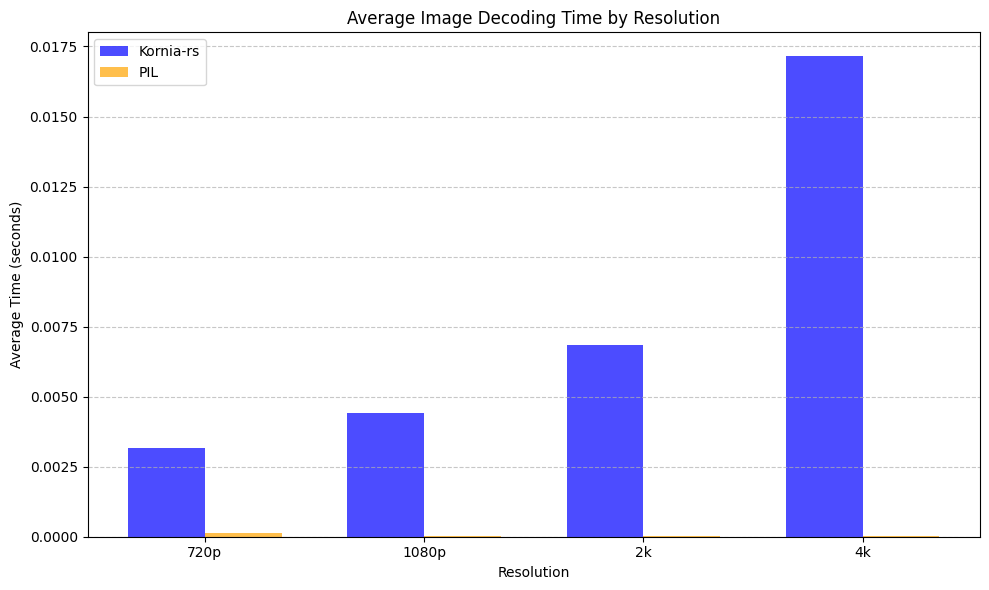

In [7]:
import numpy as np

import matplotlib.pyplot as plt

# Resolutions and average times
resolutions = ['720p', '1080p', '2k', '4k']
kornia_rs_avg = [avg_kornia_rs_720p, avg_kornia_rs_1080p, avg_kornia_rs_2k, avg_kornia_rs_4k]
pil_avg = [avg_pil_720p, avg_pil_1080p, avg_pil_2k, avg_pil_4k]

# Bar width and positions
bar_width = 0.35
x = np.arange(len(resolutions))

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width / 2, kornia_rs_avg, bar_width, label='Kornia-rs', color='blue', alpha=0.7)
plt.bar(x + bar_width / 2, pil_avg, bar_width, label='PIL', color='orange', alpha=0.7)

# Adding labels, title, and legend
plt.xlabel('Resolution')
plt.ylabel('Average Time (seconds)')
plt.title('Average Image Decoding Time by Resolution')
plt.xticks(x, resolutions)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()